In [1]:
my_df  <- PlantGrowth
str(my_df)

'data.frame':	30 obs. of  2 variables:
 $ weight: num  4.17 5.58 5.18 6.11 4.5 4.61 5.17 4.53 5.33 5.14 ...
 $ group : Factor w/ 3 levels "ctrl","trt1",..: 1 1 1 1 1 1 1 1 1 1 ...


In [2]:
set.seed(1234)
dplyr::sample_n(my_df,10)

weight,group
6.15,trt2
3.83,trt1
5.29,trt2
5.12,trt2
4.50,ctrl
4.17,trt1
5.87,trt1
5.33,ctrl
5.26,trt2
4.61,ctrl


In [3]:
levels(my_df$group)

[1] "ctrl" "trt1" "trt2"

In [5]:
#if we want to order the levels
my_df$group  <- orderd(my_df$group,levels=t('trt1','trt2','crt'))

ERROR: Error in orderd(my_df$group, levels = t("trt1", "trt2", "crt")): could not find function "orderd"


In [4]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [ ]:
my_df%>%
group_by(group)%>%
summarize(count=n(),mn_val=mean(weight,na.rm=TRUE))

In [7]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


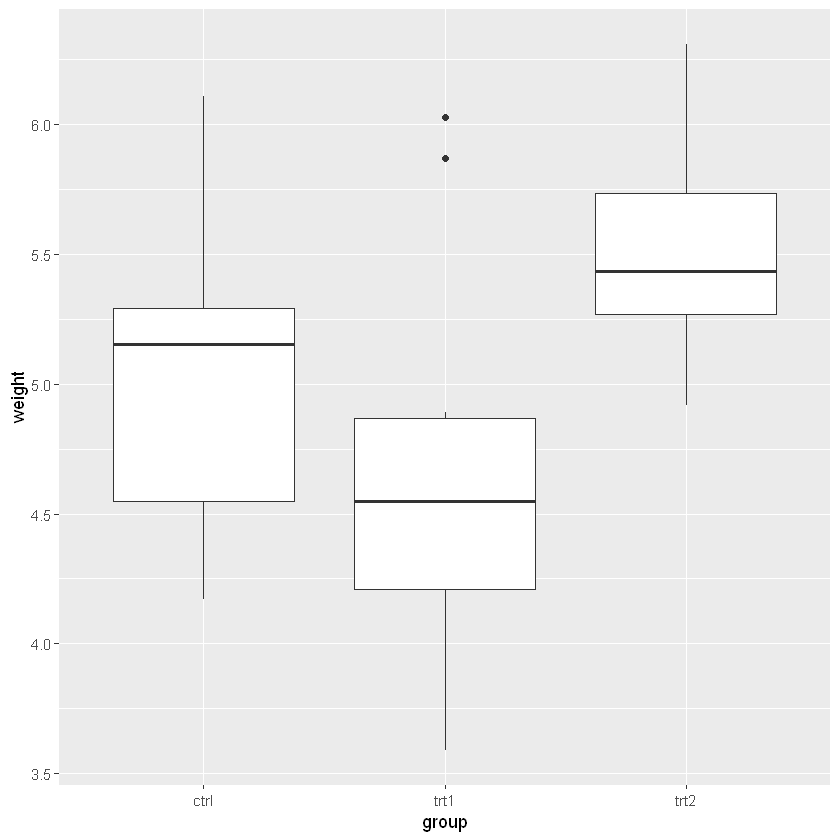

In [8]:
ggplot(my_df,aes(x=group,y=weight))+geom_boxplot()

In [9]:
res.aov  <- aov(weight ~ group,data = my_df)
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  3.766  1.8832   4.846 0.0159 *
Residuals   27 10.492  0.3886                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [11]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ group, data = my_df)

$group
            diff        lwr       upr     p adj
trt1-ctrl -0.371 -1.0622161 0.3202161 0.3908711
trt2-ctrl  0.494 -0.1972161 1.1852161 0.1979960
trt2-trt1  0.865  0.1737839 1.5562161 0.0120064


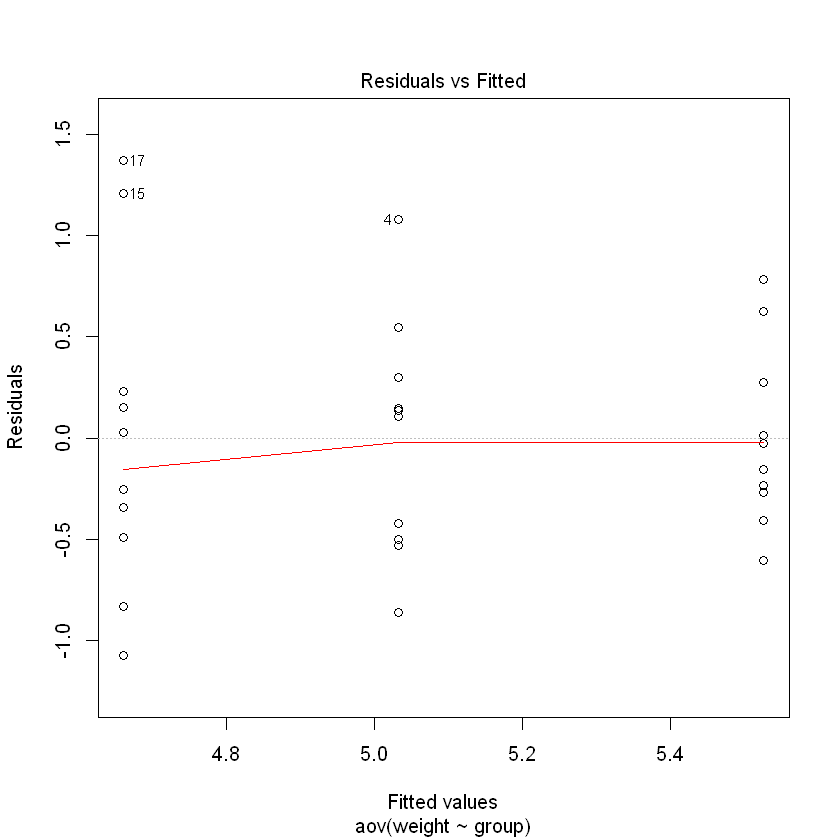

In [12]:
plot(res.aov,1)

In [13]:
library(car)

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



In [14]:
leveneTest(weight ~ group,data = my_df )

,Df,F value,Pr(>F)
group,2,1.119186,0.3412266
,27,NA,NA


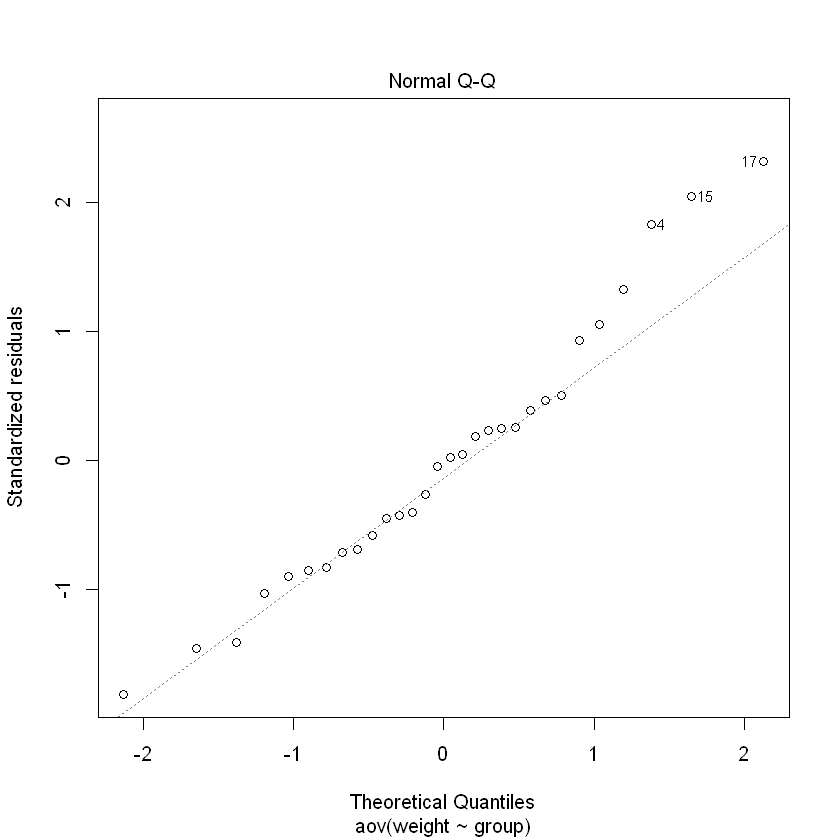

In [15]:
plot(res.aov,2)

In [16]:
aov_residuals  <-  residuals(object = res.aov)
shapiro.test(x = aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.96607, p-value = 0.4379


In [18]:
kruskal.test(weight ~ group,data = my_df)


	Kruskal-Wallis rank sum test

data:  weight by group
Kruskal-Wallis chi-squared = 7.9882, df = 2, p-value = 0.01842


2 -way annova test

In [19]:
my_df  <-  ToothGrowth
str(my_df)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


In [20]:
set.seed(1234)
sample_n(my_df,10)

len,supp,dose
21.5,VC,2.0
17.3,VC,1.0
27.3,OJ,2.0
18.5,VC,2.0
8.2,OJ,0.5
26.4,OJ,1.0
25.8,OJ,1.0
5.2,VC,0.5
6.4,VC,0.5
9.4,OJ,0.5


In [21]:
my_df$dose  <-  factor(my_df$dose,
                      levels =c(0.5, 1, 2),
                      labels = c("D0.5", "D1", "D2"))
head(my_df)

len,supp,dose
4.2,VC,D0.5
11.5,VC,D0.5
7.3,VC,D0.5
5.8,VC,D0.5
6.4,VC,D0.5
10.0,VC,D0.5


In [22]:
table(my_df$supp)


OJ VC 
30 30 

In [23]:
table(my_df$supp, my_df$dose)

    
     D0.5 D1 D2
  OJ   10 10 10
  VC   10 10 10

In [26]:
my_df%>%
group_by(supp,dose)%>%
summarize(count=n(),mn=mean(len,na.rm= TRUE),sd=sd(len,na.rm=TRUE))

supp,dose,count,mn,sd
OJ,D0.5,10,13.23,4.459709
OJ,D1,10,22.70,3.910953
OJ,D2,10,26.06,2.655058
VC,D0.5,10,7.98,2.746634
VC,D1,10,16.77,2.515309
VC,D2,10,26.14,4.797731


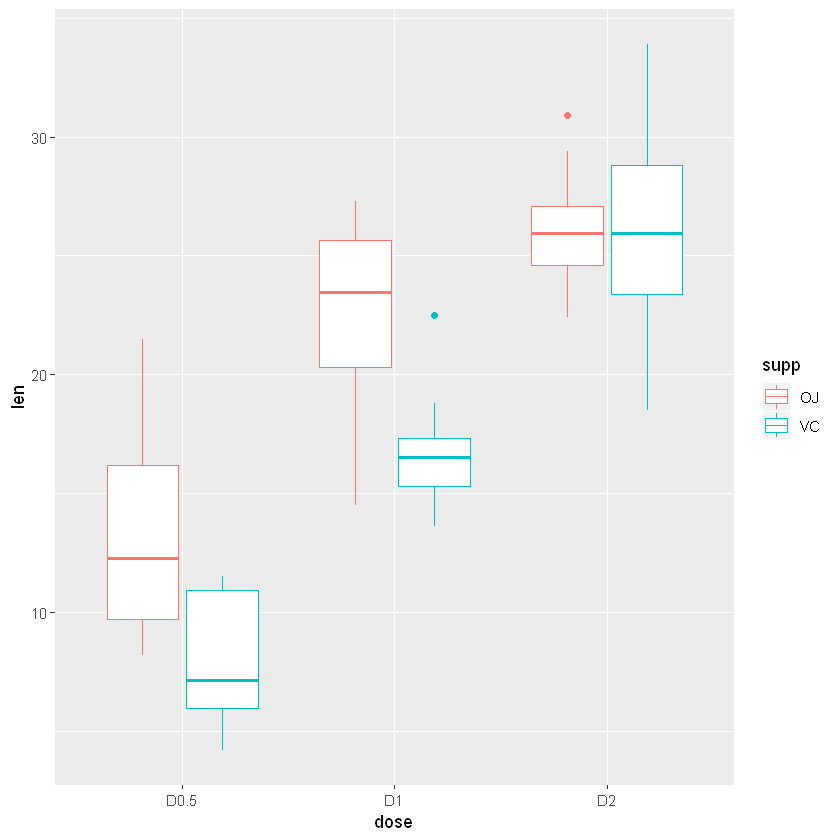

In [27]:
ggplot(my_df,aes(x=dose,y=len,color=supp))+geom_boxplot()

In [29]:
res.aov2  <- aov(len ~ supp + dose,data = my_df)
summary(res.aov2)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4   14.02 0.000429 ***
dose         2 2426.4  1213.2   82.81  < 2e-16 ***
Residuals   56  820.4    14.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [31]:
res.aov3  <- aov(len ~ supp * dose, data = my_df)
summary(res.aov3)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  15.572 0.000231 ***
dose         2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose    2  108.3    54.2   4.107 0.021860 *  
Residuals   54  712.1    13.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [33]:
TukeyHSD(res.aov3, which = "dose")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = len ~ supp * dose, data = my_df)

$dose
          diff       lwr       upr   p adj
D1-D0.5  9.130  6.362488 11.897512 0.0e+00
D2-D0.5 15.495 12.727488 18.262512 0.0e+00
D2-D1    6.365  3.597488  9.132512 2.7e-06


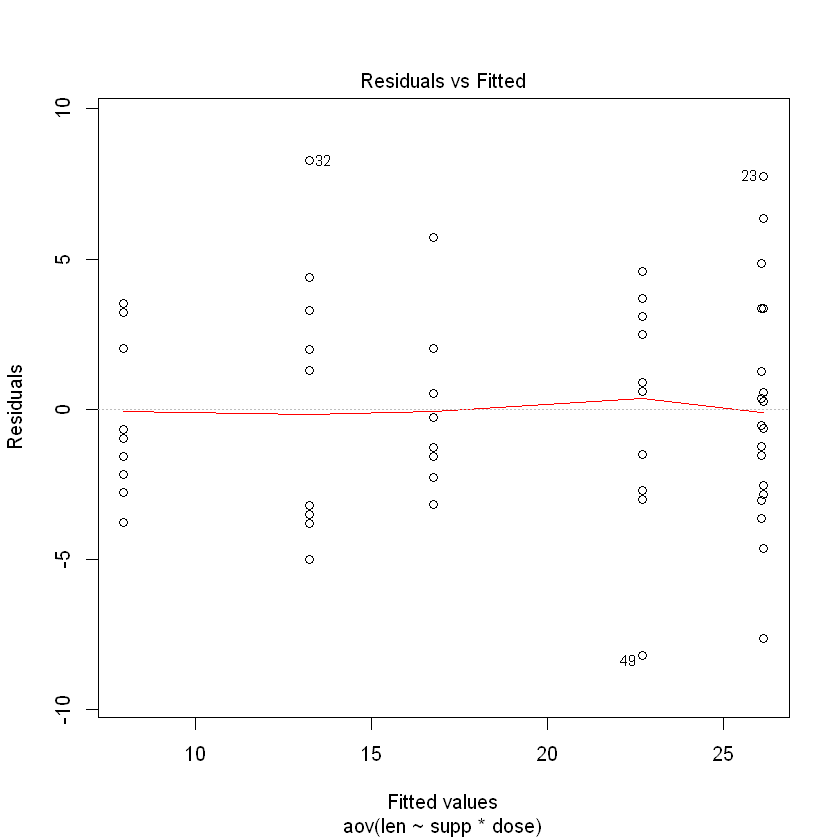

In [34]:
plot(res.aov3,1)

In [35]:
leveneTest(len ~ supp*dose, data = my_df)

,Df,F value,Pr(>F)
group,5,1.708578,0.1483606
,54,NA,NA


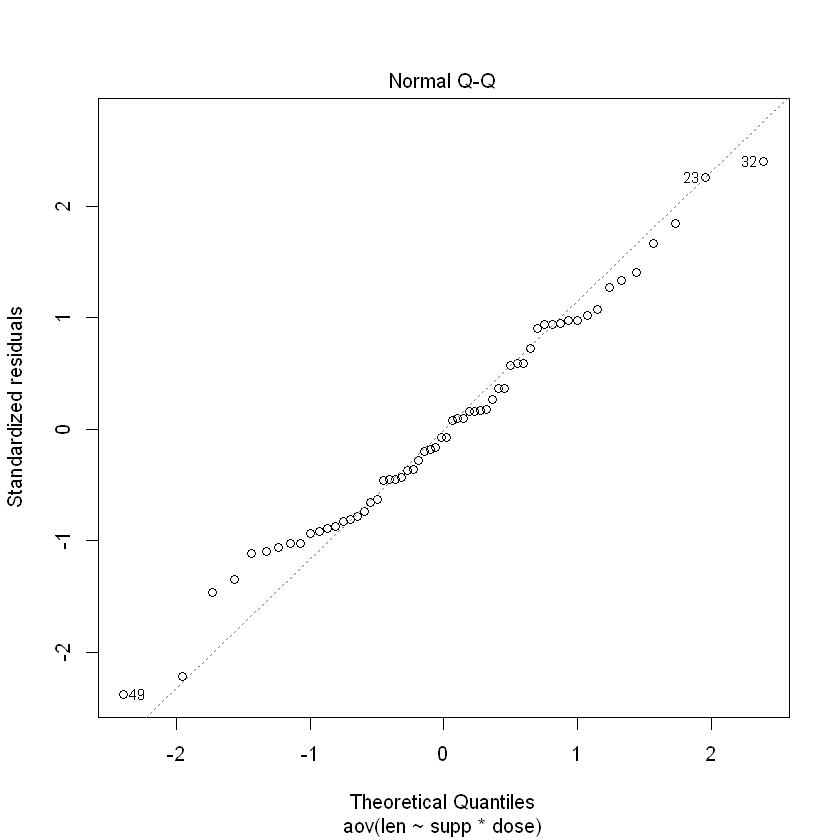

In [36]:
plot(res.aov3, 2)

In [37]:
aov_residuals  <-  residuals(object = res.aov3)
shapiro.test(x = aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.98499, p-value = 0.6694


In [38]:
my_anova  <-  aov(len ~ supp * dose, data = my_df)
Anova(my_anova, type = "III")

,Sum Sq,Df,F value,Pr(>F)
(Intercept),1750.3290,1,132.729911,3.602548e-16
supp,137.8125,1,10.450516,2.092470e-03
dose,885.2647,2,33.565433,3.363190e-10
supp:dose,108.3190,2,4.106991,2.186027e-02
Residuals,712.1060,54,NA,NA


In [39]:
my_df  <- iris
str(my_df)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [40]:
set.seed(1234)
sample_n(my_df,10)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.2,3.5,1.5,0.2,setosa
5.7,2.6,3.5,1.0,versicolor
6.3,3.3,6.0,2.5,virginica
6.5,3.2,5.1,2.0,virginica
6.3,3.4,5.6,2.4,virginica
6.4,2.8,5.6,2.2,virginica
6.8,3.2,5.9,2.3,virginica
7.9,3.8,6.4,2.0,virginica
6.2,2.9,4.3,1.3,versicolor
7.1,3.0,5.9,2.1,virginica


In [42]:
sep1  <-  iris$Sepal.Length
pet1  <-  iris$Petal.Length
res.mam  <-  manova(cbind(Sepal.Length,Petal.Length) ~ Species, data = iris)
summary(res.mam)

           Df Pillai approx F num Df den Df    Pr(>F)    
Species     2 0.9885   71.829      4    294 < 2.2e-16 ***
Residuals 147                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [44]:
summary.aov(res.mam)

 Response Sepal.Length :
             Df Sum Sq Mean Sq F value    Pr(>F)    
Species       2 63.212  31.606  119.26 < 2.2e-16 ***
Residuals   147 38.956   0.265                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response Petal.Length :
             Df Sum Sq Mean Sq F value    Pr(>F)    
Species       2 437.10 218.551  1180.2 < 2.2e-16 ***
Residuals   147  27.22   0.185                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
